In [1]:
#Imports
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, ElasticNet, Ridge, Lasso
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error, confusion_matrix, classification_report,accuracy_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn import svm
from sklearn.neural_network import MLPClassifier

%matplotlib inline

df = pd.read_csv('ManyRatings_Dataset_Cleaned.csv') # Read csv

# Attributes View

In [2]:
pd.options.display.max_columns = df.shape[1] # Full view of df
df.describe(include='all')

,Movie_name,Release_Year,IMDB_Rating,Metascore,Reviewer_count,Censor_Board_Rating,Genre_1,Genre_2,Genre_3,Director,Writer_1,Writer_2,Star_1,Star_2,Star_3,Plot_Keywords,Budget,Gross_USA,Cum_Worldwide_Gross,Production_Company,Length_in_minutes,Release_Month
count,1354,1354.000000,1354.000000,1354.000000,1.354000e+03,1354,1354,1354,1354,1354,1354,1354,1354,1354,1354,1354,1.354000e+03,1.354000e+03,1.354000e+03,1354,1354.000000,1354.000000
unique,1348,NaN,NaN,NaN,NaN,9,13,20,19,592,1096,924,504,781,949,1354,NaN,NaN,NaN,1184,NaN,NaN
top,Total Recall,NaN,NaN,NaN,NaN,R,Action,Adventure,,Steven Spielberg,Quentin Tarantino,,Johnny Depp,Samuel L. Jackson,Morgan Freeman,holster|shoulder holster|shoulder|good versus ...,NaN,NaN,NaN,Paramount Pictures,NaN,NaN
freq,2,NaN,NaN,NaN,NaN,523,523,328,352,18,7,289,27,9,10,1,NaN,NaN,NaN,13,NaN,NaN
mean,NaN,2004.415066,6.966100,60.781388,2.827752e+05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.645535e+07,1.075557e+08,2.554950e+08,NaN,116.516248,6.605613
std,NaN,8.219851,0.784454,15.896219,2.528553e+05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.690060e+07,9.835862e+07,2.740067e+08,NaN,20.268708,3.477453
min,NaN,1990.000000,3.600000,11.000000,2.088400e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000e+06,3.047100e+04,3.047100e+04,NaN,76.000000,1.000000
25%,NaN,1998.000000,6.500000,49.000000,1.310452e+05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.500000e+07,4.319168e+07,7.897125e+07,NaN,102.000000,3.000000
50%,NaN,2004.000000,7.000000,61.000000,2.117200e+05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.000000e+07,7.620477e+07,1.716738e+08,NaN,114.000000,7.000000
75%,NaN,2012.000000,7.500000,72.000000,3.434645e+05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.150000e+07,1.387502e+08,3.218525e+08,NaN,129.000000,10.000000


In [3]:
df.head()

,Movie_name,Release_Year,IMDB_Rating,Metascore,Reviewer_count,Censor_Board_Rating,Genre_1,Genre_2,Genre_3,Director,Writer_1,Writer_2,Star_1,Star_2,Star_3,Plot_Keywords,Budget,Gross_USA,Cum_Worldwide_Gross,Production_Company,Length_in_minutes,Release_Month
0,Goodfellas,1990,8.7,90.0,983254,16,Biography,Crime,Drama,Martin Scorsese,Nicholas Pileggi(book),Nicholas Pileggi(screenplay),Robert De Niro,Ray Liotta,Joe Pesci,gangster|organized crime|sadistic psychopath|m...,25000000.0,46836214.0,46879633.0,Warner Bros.,146,9
1,Home Alone,1990,7.6,63.0,448940,Not Rated,Comedy,Family,,Chris Columbus,John Hughes,,Macaulay Culkin,Joe Pesci,Daniel Stern,christmas|home alone|burglary|child protagonis...,18000000.0,285761243.0,477063114.0,"Hughes Entertainment,Twentieth Century Fox",103,3
2,Edward Scissorhands,1990,7.9,74.0,435025,PG,Drama,Fantasy,Romance,Tim Burton,Tim Burton(story),Caroline Thompson(story),Johnny Depp,Winona Ryder,Dianne Wiest,scissors|compassion|surrealism|waterbed|love,20000000.0,56362352.0,86024005.0,Twentieth Century Fox,105,12
3,Back to the Future Part III,1990,7.4,55.0,389988,Not Rated,Adventure,Comedy,Sci-Fi,Robert Zemeckis,Robert Zemeckis(characters),Bob Gale(characters),Michael J. Fox,Christopher Lloyd,Mary Steenburgen,year 1955|year 1885|woman|purple dress|girl ne...,40000000.0,88277583.0,249130916.0,"Universal Pictures,Amblin Entertainment,U-Driv...",118,7
4,The Godfather: Part III,1990,7.6,60.0,347836,PG,Crime,Drama,,Francis Ford Coppola,Mario Puzo,Francis Ford Coppola,Al Pacino,Diane Keaton,Andy Garcia,opera|vatican|italy|gangster|catholic church,54000000.0,66666062.0,136766062.0,"Paramount Pictures,Zoetrope Studios",162,12


In [4]:
df.isnull().sum()

Movie_name             0
Release_Year           0
IMDB_Rating            0
Metascore              0
Reviewer_count         0
Censor_Board_Rating    0
Genre_1                0
Genre_2                0
Genre_3                0
Director               0
Writer_1               0
Writer_2               0
Star_1                 0
Star_2                 0
Star_3                 0
Plot_Keywords          0
Budget                 0
Gross_USA              0
Cum_Worldwide_Gross    0
Production_Company     0
Length_in_minutes      0
Release_Month          0
dtype: int64

# Data Preperation

In [5]:
bins = (2e+04,2e+8,4e+8,2.8e+09) # Grouping for predicted value
group_names = ['a','b','c']
df['Cum_Worldwide_Gross'] = pd.cut(df['Cum_Worldwide_Gross'],bins=bins, labels = group_names)
df['Cum_Worldwide_Gross'].unique()

[a, c, b]
Categories (3, object): [a < b < c]

In [6]:
label_quality = LabelEncoder() # Labeling

In [7]:
label_quality.fit(df[['Genre_1', 'Genre_2','Production_Company','Director','Writer_1','Star_1','Star_2','Censor_Board_Rating']].stack().unique())
df['Genre_1'] = label_quality.transform(df['Genre_1'])
df['Genre_2'] = label_quality.transform(df['Genre_2'])
df['Production_Company'] = label_quality.transform(df['Production_Company'])
df['Director'] = label_quality.transform(df['Director'])
df['Writer_1'] = label_quality.transform(df['Writer_1'])
df['Star_1'] = label_quality.transform(df['Star_1'])
df['Star_2'] = label_quality.transform(df['Star_2'])
df['Censor_Board_Rating'] = label_quality.transform(df['Censor_Board_Rating'])
df['Cum_Worldwide_Gross'] = label_quality.fit_transform(df['Cum_Worldwide_Gross'])

df.sample(10)

,Movie_name,Release_Year,IMDB_Rating,Metascore,Reviewer_count,Censor_Board_Rating,Genre_1,Genre_2,Genre_3,Director,Writer_1,Writer_2,Star_1,Star_2,Star_3,Plot_Keywords,Budget,Gross_USA,Cum_Worldwide_Gross,Production_Company,Length_in_minutes,Release_Month
1203,The Age of Adaline,2015,7.2,51.0,149524,2466,935,1105,Romance,1958,1435,Salvador Paskowitz(screenplay by),309,2261,Harrison Ford,aging|change of identity|year 1981|year 1952|c...,25000000.0,42629776.0,0,1930,112,5
960,Hot Tub Time Machine,2010,6.4,63.0,159270,2696,685,2923,,3065,1789,Sean Anders(screenplay),1665,2787,Craig Robinson,bare breasts|ski resort|cheating wife|promiscu...,36000000.0,50287556.0,0,2191,101,3
510,A Knight's Tale,2001,6.9,56.0,165797,2466,30,42,Romance,364,364,,1347,2084,Rufus Sewell,medieval times|knight|jousting|chaucer|knight ...,65000000.0,56569702.0,0,611,132,10
650,Man on Fire,2004,7.7,47.0,322121,2696,30,707,Drama,3245,10,Brian Helgeland(screenplay),872,552,Dakota Fanning,kidnapping|mexico|bodyguard|kidnapped girl|cor...,70000000.0,77911774.0,0,1147,146,9
563,We Were Soldiers,2002,7.2,65.0,127233,2696,30,935,History,2710,1338,Joseph L. Galloway(book),2173,2054,Greg Kinnear,battle|soldier|vietnam war|helicopter|french s...,75000000.0,78122718.0,0,1404,138,5
764,She's the Man,2006,6.3,45.0,142880,2466,685,2841,Sport,162,1093,Karen McCullah(screenplay),123,1948,Channing Tatum,love triangle|pretending to be someone else|gi...,20000000.0,33741133.0,0,957,105,3
1207,The Gift,2015,7.0,77.0,134100,2696,935,2326,Thriller,1646,1646,,1518,2722,Joel Edgerton,gift|psycho thriller|rape|substance abuse|preg...,5000000.0,43787265.0,0,316,108,8
703,A History of Violence,2005,7.4,81.0,219403,3,935,3183,,800,1719,Vince Locke(graphic novel),3512,2077,Ed Harris,robbery|small town cafe|mobster|attempted robb...,32000000.0,31504633.0,0,2359,96,10
709,The Hitchhiker's Guide to the Galaxy,2005,6.8,63.0,183554,2465,42,685,Sci-Fi,1201,930,Douglas Adams(screenplay),2118,3725,Sam Rockwell,hyperspace|robot|cow|norway|male alien,50000000.0,51085416.0,0,3270,109,5
634,Harry Potter and the Prisoner of Azkaban,2004,7.9,82.0,528780,2465,42,1102,Fantasy,100,1445,Steve Kloves(screenplay),760,1052,Rupert Grint,magic|wizard|school of magic|wrongful convicti...,130000000.0,249975996.0,2,3567,142,6


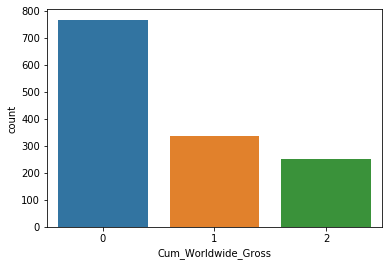

In [8]:
sns.countplot(df['Cum_Worldwide_Gross']) # Results Division

In [9]:
df.columns

Index(['Movie_name', 'Release_Year', 'IMDB_Rating', 'Metascore',
       'Reviewer_count', 'Censor_Board_Rating', 'Genre_1', 'Genre_2',
       'Genre_3', 'Director', 'Writer_1', 'Writer_2', 'Star_1', 'Star_2',
       'Star_3', 'Plot_Keywords', 'Budget', 'Gross_USA', 'Cum_Worldwide_Gross',
       'Production_Company', 'Length_in_minutes', 'Release_Month'],
      dtype='object')

In [10]:
#plt.subplots(figsize=(20,15)) # Confusion Matrix
#corrMatrix = df.corr()
#sns.heatmap(corrMatrix, annot=True)
#plt.show()

In [25]:
# 'IMDB_Rating', 'Release_Year', 'Metascore', 'Reviewer_count', 'Censor_Board_Rating', 'Genre_1','Director','Writer_1','Star_1','Budget','Production_Company','Length_in_minutes','Release_Month'
X = df[['Budget', 'Reviewer_count', 'Release_Year', 'Genre_1', 'Length_in_minutes']] # Choose Columns for ML
y = df['Cum_Worldwide_Gross'] # Prediction target

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 42) # Data split

In [27]:
sc = StandardScaler() # Standardize
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Random Forest Classifier

In [28]:
rfc = RandomForestClassifier(n_estimators=200, random_state=12)
rfc.fit(X_train,y_train)
pred_rfc = rfc.predict(X_test)

In [29]:
print("Random Forest Classifier Results:\n")
print("Accuracy Score:",accuracy_score(y_test,pred_rfc),"\n")
print("Classification Report:\n",classification_report(y_test, pred_rfc))
print("Confusion Matrix:\n",confusion_matrix(y_test,pred_rfc))

Random Forest Classifier Results:

Accuracy Score: 0.7490774907749077 

Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.93      0.86       153
           1       0.60      0.36      0.45        72
           2       0.71      0.74      0.72        46

    accuracy                           0.75       271
   macro avg       0.70      0.68      0.68       271
weighted avg       0.73      0.75      0.73       271

Confusion Matrix:
 [[143   8   2]
 [ 34  26  12]
 [  3   9  34]]


# SVM Classifier

In [16]:
clf = svm.SVC()
clf.fit(X_train, y_train)
pred_clf = clf.predict(X_test)

In [17]:
print("SVM Classifier Results:\n")
print("Accuracy Score:",accuracy_score(y_test,pred_clf),"\n")
print("Classification Report:\n",classification_report(y_test, pred_clf))
print("Confusion Matrix:\n",confusion_matrix(y_test,pred_clf))

SVM Classifier Results:

Accuracy Score: 0.7490774907749077 

Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.93      0.84       153
           1       0.63      0.38      0.47        72
           2       0.77      0.74      0.76        46

    accuracy                           0.75       271
   macro avg       0.72      0.68      0.69       271
weighted avg       0.73      0.75      0.73       271

Confusion Matrix:
 [[142   9   2]
 [ 37  27   8]
 [  5   7  34]]


# Neural Network

In [18]:
mlpc = MLPClassifier(hidden_layer_sizes = (10,10,10), max_iter=1500, random_state=0)
mlpc.fit(X_train, y_train)
pred_mlpc = mlpc.predict(X_test)

In [19]:
print("Neural Network Results:\n")
print("Accuracy Score:",accuracy_score(y_test,pred_mlpc),"\n")
print("Classification Report:\n",classification_report(y_test, pred_mlpc))
print("Confusion Matrix:\n",confusion_matrix(y_test,pred_mlpc))

Neural Network Results:

Accuracy Score: 0.7675276752767528 

Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.89      0.85       153
           1       0.60      0.50      0.55        72
           2       0.82      0.78      0.80        46

    accuracy                           0.77       271
   macro avg       0.74      0.72      0.73       271
weighted avg       0.76      0.77      0.76       271

Confusion Matrix:
 [[136  15   2]
 [ 30  36   6]
 [  1   9  36]]
